# Import Libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Model

In [5]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
], name="SafeModel")

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train

In [7]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 5s 8ms/step - loss: 1.4739 - accuracy: 0.4722 - val_loss: 1.2460 - val_accuracy: 0.5440
Epoch 2/10
391/391 [==============================] - 3s 6ms/step - loss: 1.0796 - accuracy: 0.6208 - val_loss: 0.9929 - val_accuracy: 0.6516
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 0.9173 - accuracy: 0.6802 - val_loss: 0.9124 - val_accuracy: 0.6790
Epoch 4/10
391/391 [==============================] - 3s 6ms/step - loss: 0.7959 - accuracy: 0.7253 - val_loss: 0.8610 - val_accuracy: 0.6976
Epoch 5/10
391/391 [==============================] - 3s 6ms/step - loss: 0.7016 - accuracy: 0.7566 - val_loss: 0.8601 - val_accuracy: 0.7070
Epoch 6/10
391/391 [==============================] - 3s 6ms/step - loss: 0.6136 - accuracy: 0.7872 - val_loss: 0.8373 - val_accuracy: 0.7112
Epoch 7/10
391/391 [==============================] - 3s 6ms/step - loss: 0.5265 - accuracy: 0.8160 - val_loss: 0.8487 - val_accuracy: 0.7209
Epoch 

# Test

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9535 - accuracy: 0.7258
Test accuracy: 0.7257999777793884


# Results

In [9]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.473948,0.47222,1.246042,0.5440
1,1.079592,0.62084,0.992948,0.6516
2,0.917277,0.68018,0.912440,0.6790
3,0.795944,0.72534,0.861039,0.6976
4,0.701605,0.75664,0.860116,0.7070


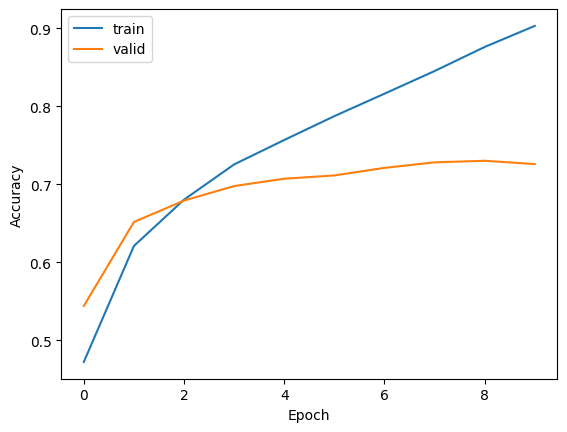

In [10]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

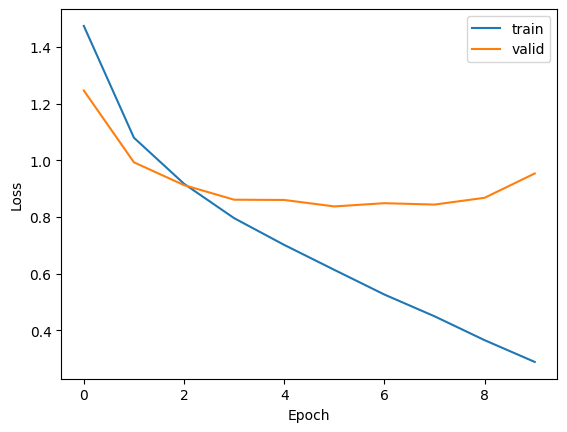

In [11]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

# Save

In [12]:
safe_model_path = "./models/safe_model.pkl"

In [13]:
with open(safe_model_path, "wb") as file:
    pickle.dump(model, file)

file.close()